In [211]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

import xgboost as xgb
import statsmodels.api as sm

# For 2nd model
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
# from sklearn.grid_search import GridSearchCV   #Perforing grid search

# Importing H2O
import time, warnings, h2o, logging, os, sys, psutil, random
from h2o.automl import H2OAutoML

from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
# from __future__ import print_function

from h2o.estimators import H2OXGBoostEstimator

import warnings
warnings.filterwarnings('ignore')

In [2]:
# get homesite & test csv files as a DataFrame
# homesite_df = pd.read_csv("C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//train.csv")
# test_df     = pd.read_csv("C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//test.csv")

homesite_df = pd.read_csv("train.csv")
test_df     = pd.read_csv("test.csv")

# preview the data
homesite_df.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [257]:
homesite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 300 entries, QuoteConversion_Flag to Week
dtypes: float64(6), int64(294)
memory usage: 596.8 MB


In [258]:
homesite_df.describe()

,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,...,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,Year,Month,Week
count,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,...,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000
mean,0.187511,3.679823,18.293339,0.938346,0.001451,3.917800,1.162718,0.072429,9.012533,13.000403,...,12.994362,-0.343601,13.042734,-0.341009,14.122948,1.023152,1.401108,2013.776532,5.675532,15.414465
std,0.390322,2.184370,7.382803,0.037086,0.001486,2.466246,0.116833,0.259197,5.576509,7.219264,...,7.219943,4.078673,7.145248,4.086511,5.829091,0.150438,1.210544,0.726497,3.305120,8.760221
min,0.000000,0.000000,1.000000,0.874600,0.000400,0.000000,1.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,0.000000,1.000000,11.000000,0.915300,0.000600,2.000000,1.020000,0.000000,5.000000,7.000000,...,7.000000,-1.000000,7.000000,-1.000000,8.000000,1.000000,0.000000,2013.000000,3.000000,8.000000
50%,0.000000,5.000000,23.000000,0.940300,0.000600,4.000000,1.188600,0.000000,8.000000,13.000000,...,13.000000,-1.000000,13.000000,-1.000000,13.000000,1.000000,2.000000,2014.000000,5.000000,15.000000
75%,0.000000,5.000000,24.000000,0.968500,0.003800,6.000000,1.266500,0.000000,12.000000,19.000000,...,19.000000,-1.000000,19.000000,-1.000000,19.000000,1.000000,2.000000,2014.000000,8.000000,23.000000
max,1.000000,7.000000,28.000000,1.010100,0.004000,7.000000,1.304500,1.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,2.000000,3.000000,2015.000000,12.000000,31.000000


In [3]:
homesite_df.info()
print("---------------------------------------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 299 entries, QuoteNumber to GeographicField64
dtypes: float64(6), int64(265), object(28)
memory usage: 594.8+ MB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Columns: 298 entries, QuoteNumber to GeographicField64
dtypes: float64(6), int64(264), object(28)
memory usage: 395.2+ MB


In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
homesite_df = homesite_df.drop(['QuoteNumber'], axis=1)

In [5]:
# date

# Convert Date to Year, Month, and Week
homesite_df['Year']  = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[:4]))
homesite_df['Month'] = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[5:7]))
homesite_df['Week']  = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[8:10]))

test_df['Year']  = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[5:7]))
test_df['Week']  = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[8:10]))

homesite_df.drop(['Original_Quote_Date'], axis=1,inplace=True)
test_df.drop(['Original_Quote_Date'], axis=1,inplace=True)

In [247]:
homesite_df.isnull().sum()

QuoteConversion_Flag    0
Field6                  0
Field7                  0
Field8                  0
Field9                  0
Field10                 0
Field11                 0
Field12                 0
CoverageField1A         0
CoverageField1B         0
CoverageField2A         0
CoverageField2B         0
CoverageField3A         0
CoverageField3B         0
CoverageField4A         0
CoverageField4B         0
CoverageField5A         0
CoverageField5B         0
CoverageField6A         0
CoverageField6B         0
CoverageField8          0
CoverageField9          0
CoverageField11A        0
CoverageField11B        0
SalesField1A            0
SalesField1B            0
SalesField2A            0
SalesField2B            0
SalesField3             0
SalesField4             0
                       ..
GeographicField50B      0
GeographicField51A      0
GeographicField51B      0
GeographicField52A      0
GeographicField52B      0
GeographicField53A      0
GeographicField53B      0
GeographicFi

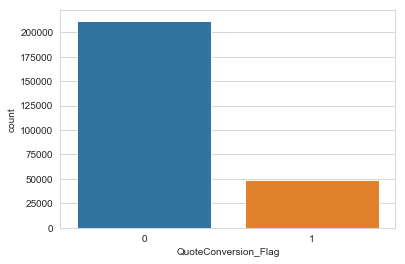

In [6]:
# customers purchased insurance plan
# Plot
sns.countplot(x="QuoteConversion_Flag", data=homesite_df)

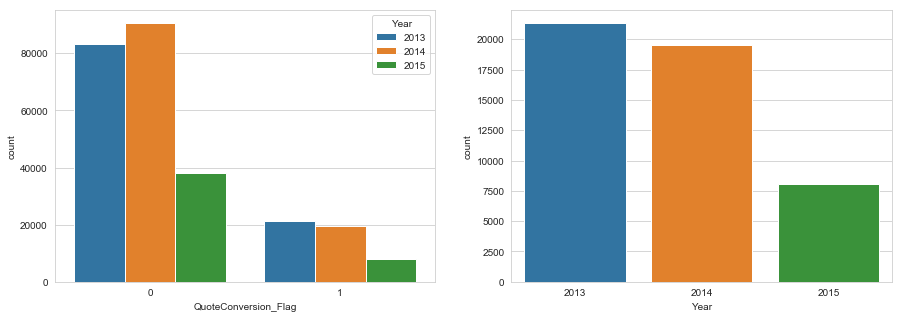

In [7]:
# year
# Which year has higher number of customers purchased insurance plan

# Plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="QuoteConversion_Flag",hue="Year", data=homesite_df, ax=axis1)
sns.countplot(x=homesite_df["Year"].loc[homesite_df["QuoteConversion_Flag"] == 1], 
              order=[2013,2014,2015], ax=axis2)

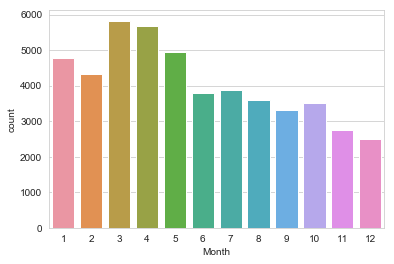

In [8]:
# month
# Which month has higher number of customers purchased insurance plan

# Plot
sns.countplot(x=homesite_df["Month"].loc[homesite_df["QuoteConversion_Flag"] == 1], 
              order=[1,2,3,4,5,6,7,8,9,10,11,12])

In [9]:
# fill NaN values
homesite_df.fillna(-1, inplace=True)
test_df.fillna(-1, inplace=True)

In [10]:
# There are some columns with non-numerical values(i.e. dtype='object'),
# So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.

from sklearn import preprocessing

for f in homesite_df.columns:
    if homesite_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(homesite_df[f].values) + list(test_df[f].values)))
        homesite_df[f] = lbl.transform(list(homesite_df[f].values))
        test_df[f] = lbl.transform(list(test_df[f].values))

### Plotting Correlation Matrix

In [ ]:
X_train.corr()

In [ ]:
counter=0
plt_cnt=0
for columns in X_train:
    if counter == 0:
        df_heat= pd.DataFrame(homesite_df["QuoteConversion_Flag"])
        plt_cnt=plt_cnt+1
    if counter<30:
        counter=counter+1
        df_heat[columns]= + homesite_df[columns]
    if counter==30:
        print("Plot Number: " , plt_cnt)
        plt.figure(figsize=(20,12))
        sns.heatmap(data=df_heat.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
        plt.show()
        counter=0
        df_heat=df_heat.iloc[0:0]

## Logistic Regression Model

In [11]:
logReg = LogisticRegression(random_state=0)

In [12]:
ylog= homesite_df["QuoteConversion_Flag"]
xlog = homesite_df.drop("QuoteConversion_Flag",axis=1)

# Xlog_test  = test_df.drop("QuoteNumber",axis=1).copy()
# Ylog_test  = test_df["QuoteConversion_Flag"]

In [13]:
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(xlog,ylog,test_size=0.1)

In [14]:
print (Xlog_train.shape, ylog_train.shape)
print (Xlog_test.shape, ylog_test.shape)

(234677, 299) (234677,)
(26076, 299) (26076,)


In [15]:
# Predicting the test set results and creating confusion matrix
results_logistic = logReg.fit(Xlog_train, ylog_train)
print (results_logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [16]:
ylog_pred = logReg.predict(Xlog_test)
ylog_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
np.array(ylog_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
# Predicting the test set results and creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ylog_test, ylog_pred)
print(confusion_matrix)

[[20470   732]
 [ 2612  2262]]


In [19]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(Xlog_test, ylog_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [20]:
from sklearn.metrics import classification_report
print(classification_report(ylog_test, ylog_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92     21202
           1       0.76      0.46      0.57      4874

   micro avg       0.87      0.87      0.87     26076
   macro avg       0.82      0.71      0.75     26076
weighted avg       0.86      0.87      0.86     26076



In [21]:
# summary_log = sm.Logit(ylog, xlog).fit()
# summary_log.summary()

In [22]:
logReg.predict_proba(Xlog_train)

array([[0.73411732, 0.26588268],
       [0.85758357, 0.14241643],
       [0.98419029, 0.01580971],
       ...,
       [0.62861288, 0.37138712],
       [0.99762758, 0.00237242],
       [0.82273742, 0.17726258]])

In [23]:
logReg.predict_proba(Xlog_test)

array([[0.72227694, 0.27772306],
       [0.91428507, 0.08571493],
       [0.96955784, 0.03044216],
       ...,
       [0.84080814, 0.15919186],
       [0.99297845, 0.00702155],
       [0.72322322, 0.27677678]])

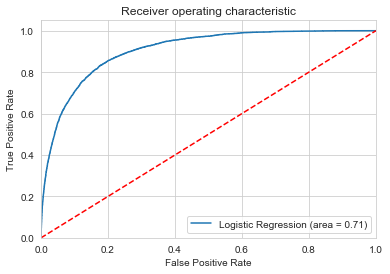

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ylog_test, logReg.predict(Xlog_test))
fpr, tpr, thresholds = roc_curve(ylog_test, logReg.predict_proba(Xlog_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## XGBoost Model

### XGB - Model 1

In [25]:
# define training and testing sets

X_train = homesite_df.drop("QuoteConversion_Flag",axis=1)
Y_train = homesite_df["QuoteConversion_Flag"]
X_test  = test_df.drop("QuoteNumber",axis=1).copy()

In [26]:
# Xgboost 

params = {"objective": "binary:logistic"}

T_train_xgb = xgb.DMatrix(X_train, Y_train)
X_test_xgb  = xgb.DMatrix(X_test)

In [27]:
Xgbm = xgb.train(params, T_train_xgb, 50)

In [28]:
Y_pred = Xgbm.predict(X_test_xgb)

In [187]:
Y_pred.shape

(173836,)

In [30]:
df1=pd.DataFrame([test_df.QuoteNumber,np.array(Y_pred)])

In [31]:
df1

,0,1,2,3,4,5,6,7,8,9,...,173826,173827,173828,173829,173830,173831,173832,173833,173834,173835
QuoteNumber,3.000000,5.000000,7.000000,9.000000,10.000000,11.00000,15.000000,16.000000,17.000000,21.000000,...,434554.000000,434558.000000,434560.000000,434563.000000,434565.000000,434570.000000,434573.000000,434574.000000,434575.000000,434589.00000
Unnamed 0,0.000954,0.043804,0.028649,0.011978,0.172735,0.02068,0.000309,0.030525,0.000091,0.000091,...,0.048629,0.000295,0.000112,0.997603,0.269796,0.179163,0.219987,0.998138,0.000472,0.20232


In [32]:
# df_output=df1.T
# df_output.to_csv(r'C://Users//kaila//OneDrive//Desktop//DSMT//XGBoostTest5.csv')

In [33]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = Y_pred

In [34]:
subfile = 'PredictionsL8_round.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: PredictionsL8_round.csv


### XGB - Model 2

In [35]:
X_train = homesite_df
Y_train = homesite_df["QuoteConversion_Flag"]
X_test  = test_df.drop("QuoteNumber",axis=1).copy()
# Y_test  = test_df["QuoteNumber"]

target='QuoteConversion_Flag'

In [37]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])
            
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['QuoteConversion_Flag'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['QuoteConversion_Flag'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['QuoteConversion_Flag'], dtrain_predprob))

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances',figsize=(20,12))
    plt.ylabel('Feature Importance Score')
        
    return dtrain_predictions,dtrain_predictions, cvresult, feat_imp


Model Report
Accuracy : 0.9395
AUC Score (Train): 0.977199


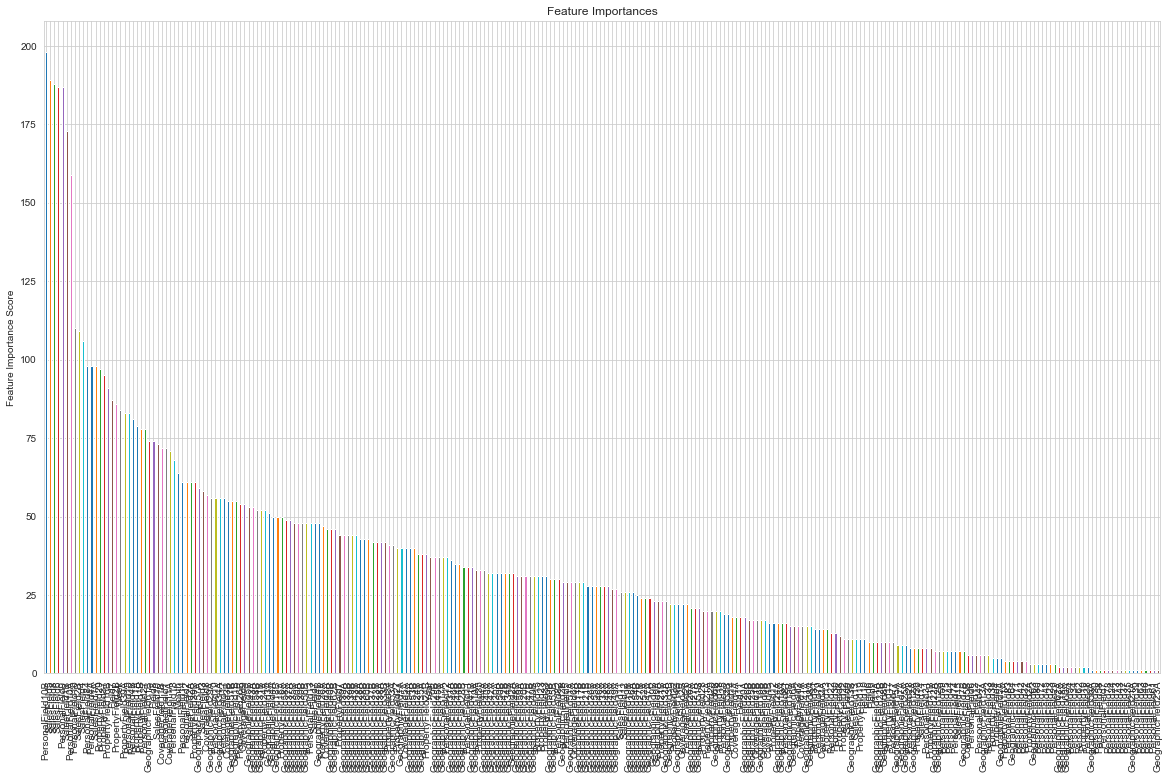

In [38]:
predictors = [x for x in X_train.columns if x not in [target]]

xgb1 = XGBClassifier(
 max_depth=8,
 learning_rate =0.1,
 n_estimators=500,
 objective= 'binary:logistic',
 min_child_weight=1,
 gamma=10,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=11,
 scale_pos_weight=1,
# reg_alpha=L1,
 seed=27)

train_pred, train_prob, cvresult, feat_imp = modelfit(xgb1, X_train, predictors)

In [39]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
train_prob

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
cvresult

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.920473,0.006674,0.920538,0.006222
1,0.929447,0.003903,0.929124,0.004887
2,0.935040,0.002564,0.934812,0.003584
3,0.937968,0.001744,0.937540,0.002852
4,0.940198,0.001308,0.939831,0.002158
5,0.940572,0.001433,0.940249,0.001929
6,0.942024,0.001156,0.941812,0.001553
7,0.942816,0.001320,0.942682,0.001979
8,0.943780,0.001198,0.943572,0.001637
9,0.944717,0.000902,0.944471,0.001525


In [42]:
feat_imp.head(50)

PersonalField10B      198
SalesField5           189
SalesField8           188
SalesField6           187
PersonalField9        187
SalesField1B          173
PersonalField10A      159
PersonalField16       110
SalesField2B          109
SalesField4           106
PersonalField84        98
PersonalField4A        98
SalesField1A           98
PropertyField29        97
PropertyField37        95
PropertyField16B       91
Field7                 87
PropertyField2B        86
Week                   84
PropertyField39A       83
PersonalField15        83
PersonalField4B        81
PropertyField1A        79
PropertyField1B        78
PersonalField27        78
GeographicField61B     74
Field8                 74
SalesField10           73
CoverageField11B       72
PersonalField1         72
CoverageField11A       71
PersonalField18        68
Month                  64
PersonalField14        61
PersonalField2         61
SalesField2A           61
PropertyField39B       61
GeographicField57A     59
SalesField3 

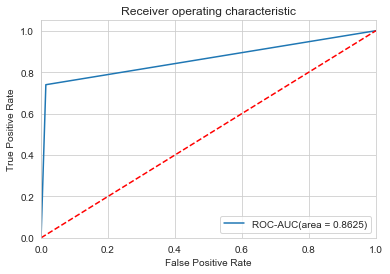

In [43]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(homesite_df["QuoteConversion_Flag"].values, train_pred)
fpr, tpr, thresholds = roc_curve(homesite_df["QuoteConversion_Flag"].values, train_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC-AUC(area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Test Predictions

In [44]:
dtest_predictions = xgb1.predict(X_test)

In [45]:
dtest_predictProba = xgb1.predict_proba(X_test)

In [46]:
dtest_predictProba

array([[9.9947876e-01, 5.2127225e-04],
       [9.6561599e-01, 3.4383990e-02],
       [9.6971691e-01, 3.0283112e-02],
       ...,
       [2.8111339e-03, 9.9718887e-01],
       [9.9986094e-01, 1.3905451e-04],
       [8.4637749e-01, 1.5362252e-01]], dtype=float32)

In [47]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = dtest_predictProba

In [48]:
subfile = 'PredictionsL14.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: PredictionsL14.csv


### Tuning max_depth and min_child_weight

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = 
                        XGBClassifier( learning_rate =0.1, n_estimators=50, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=12, scale_pos_weight=1, seed=27), 
          param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [ ]:
gsearch1.fit(X_train[predictors],X_train['QuoteConversion_Flag'])

In [ ]:
gsearch1.cv_results_

In [ ]:
gsearch1.best_params_

In [ ]:
gsearch1.best_score_

#### 2nd Try

In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=50, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=10, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=10,iid=False, cv=5)


In [ ]:
gsearch2.fit(X_train[predictors],X_train['QuoteConversion_Flag'])

In [ ]:
gsearch2.cv_results_

In [ ]:
gsearch2.best_params_

In [ ]:
gsearch2.best_score_

### H2O 

In [49]:
pct_memory=0.95
virtual_memory=psutil.virtual_memory()
print("Virtual Memory Size: ",virtual_memory)
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print("Minimum Memory Size: ",min_mem_size)

Virtual Memory Size:  svmem(total=16902189056, available=8807493632, percent=47.9, used=8094695424, free=8807493632)
Minimum Memory Size:  8


In [50]:
# Connect to a cluster
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:29233..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\kaila\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\kaila\AppData\Local\Temp\tmp1mon4qlo
  JVM stdout: C:\Users\kaila\AppData\Local\Temp\tmp1mon4qlo\h2o_Kailash_started_from_python.out
  JVM stderr: C:\Users\kaila\AppData\Local\Temp\tmp1mon4qlo\h2o_Kailash_started_from_python.err
  Server is running at http://127.0.0.1:29233
Connecting to H2O server at http://127.0.0.1:29233... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,2 months and 6 days
H2O cluster name:,H2O_from_python_Kailash_jbisbv
H2O cluster total nodes:,1
H2O cluster free memory:,7.667 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [51]:
H2O_train = h2o.import_file("train.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [66]:
H2O_test = h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [52]:
predictors=[x for x in H2O_train.columns if x not in ['QuoteConversion_Flag']]
Target='QuoteConversion_Flag'

In [253]:
# val_remove='QuoteNumber'
H2O_test = [x for x in H2O_train.columns if x not in ['QuoteNumber']]

In [53]:
# For binary classification, response should be a factor
H2O_train[Target] = H2O_train[Target].asfactor()

In [56]:
aml = H2OAutoML(max_runtime_secs=3600, seed=27)

In [254]:
os.getcwd()
os.chdir('/logs')
logs_path = os.getcwd()
logfile = 'logs.txt'

FileNotFoundError: [WinError 2] The system cannot find the file specified: '../logs'

In [58]:
model_start_time = time.time()
aml.train(x=predictors, y=Target, training_frame=H2O_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [59]:
meta_data={}
meta_data['model_execution_time'] = {"classification":(time.time() - model_start_time)}
meta_data

{'model_execution_time': {'classification': 3613.703415632248}}

In [60]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_1_AutoML_20190401_183123,0.96388,0.173366,0.137265,0.2298,0.052808
StackedEnsemble_BestOfFamily_AutoML_20190401_183123,0.962323,0.185778,0.139232,0.233857,0.054689
StackedEnsemble_AllModels_AutoML_20190401_183123,0.962323,0.185778,0.139232,0.233857,0.054689
DRF_1_AutoML_20190401_183123,0.952619,0.227683,0.145782,0.259564,0.0673737
XRT_1_AutoML_20190401_183123,0.945757,0.259927,0.154815,0.275009,0.0756301
GLM_grid_1_AutoML_20190401_183123_model_1,0.944317,0.207195,0.167292,0.248745,0.0618741


In [62]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [248]:
print(mod_best1.auc())

0.9758751240942827


In [64]:
print(mod_best1.algo)

gbm


In [67]:
pred_H2O=mod_best1.predict(H2O_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [89]:
pred_H2O

predict,p0,p1
0,0.995144,0.00485575
0,0.962084,0.0379155
0,0.961356,0.0386437
0,0.986601,0.0133986
0,0.741064,0.258936
0,0.972113,0.0278869
0,0.998157,0.00184314
0,0.96626,0.0337405
0,0.998383,0.0016165
0,0.999389,0.000610553


In [85]:
print(mod_best1.model_id)

GBM_1_AutoML_20190401_183123


In [150]:
params_list = []
for key, value in mod_best1.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190401_183123', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190401_183123'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_py_1_sid_9c47', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_py_1_sid_9c47'}",
 'validation_frame = None',
 'nfolds = 5',
 'keep_cross_validation_models = False',
 'keep_cross_validation_predictions = True',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 5',
 'fold_assignment = Modulo',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QuoteConversion_Flag', 'is_member_of_frames': None}",
 'ignored_columns = []',
 'ignore_const_cols = True',
 'offset_column = None

In [70]:
print(mod_best1.gini)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20190401_183123


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.044125363677364
RMSE: 0.21006038102737032
LogLoss: 0.14848211742305967
Mean Per-Class Error: 0.08936353802302799
AUC: 0.9758751240942827
pr_auc: 0.909755557491706
Gini: 0.9517502481885654
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39919681144371066: 


,0,1,Error,Rate
0,205500.0,6359.0,0.03,(6359.0/211859.0)
1,9358.0,39536.0,0.1914,(9358.0/48894.0)
Total,214858.0,45895.0,0.0603,(15717.0/260753.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3991968,0.8341896,182.0
max f2,0.2016316,0.8599142,260.0
max f0point5,0.5909984,0.8892301,119.0
max accuracy,0.4667009,0.9409786,158.0
max precision,0.9989818,1.0,0.0
max recall,0.0036860,1.0,391.0
max specificity,0.9989818,1.0,0.0
max absolute_mcc,0.4140555,0.7987672,177.0
max min_per_class_accuracy,0.2198792,0.9103319,252.0
max mean_per_class_accuracy,0.2270783,0.9106365,249.0


Gains/Lift Table: Avg response rate: 18.75 %, avg score: 18.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100018,0.9973599,5.3330265,5.3330265,1.0,0.9983091,1.0,0.9983091,0.0533399,0.0533399,433.3026547,433.3026547
,2,0.0200036,0.9942464,5.3309817,5.3320041,0.9996166,0.9957509,0.9998083,0.9970300,0.0533194,0.1066593,433.0981675,433.2004111
,3,0.0300016,0.9924084,5.3309809,5.3316631,0.9996164,0.9932494,0.9997443,0.9957701,0.0532990,0.1599583,433.0980891,433.1663125
,4,0.0400034,0.9908991,5.3289368,5.3309815,0.9992331,0.9916361,0.9996165,0.9947365,0.0532990,0.2132573,432.8936803,433.0981479
,5,0.0500013,0.9892065,5.3248439,5.3297542,0.9984657,0.9900926,0.9993864,0.9938080,0.0532376,0.2664949,432.4843921,432.9754250
,6,0.1000027,0.9002243,5.3056211,5.3176877,0.9948612,0.9660166,0.9971238,0.9799123,0.2652882,0.5317830,430.5621057,431.7687654
,7,0.1500002,0.4966947,4.1692266,4.9348869,0.7817749,0.6614041,0.9253445,0.8737483,0.2084509,0.7402340,316.9226553,393.4886862
,8,0.2000015,0.3243973,2.2779280,4.2706344,0.4271361,0.4035406,0.8007900,0.7561941,0.1138995,0.8541334,127.7927968,327.0634401
,9,0.3000004,0.1235426,0.9874536,3.1762548,0.1851582,0.2114380,0.5955820,0.5746111,0.0987442,0.9528777,-1.2546417,217.6254785
,10,0.3999992,0.0545189,0.3299011,2.4646732,0.0618600,0.0820002,0.4621528,0.4514596,0.0329897,0.9858674,-67.0098876,146.4673193




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.052807955887870094
RMSE: 0.2297998169883303
LogLoss: 0.17336579218896572
Mean Per-Class Error: 0.11077331368998644
AUC: 0.9638802347924962
pr_auc: 0.8654830925607323
Gini: 0.9277604695849924
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3863562344923601: 


,0,1,Error,Rate
0,203003.0,8856.0,0.0418,(8856.0/211859.0)
1,11379.0,37515.0,0.2327,(11379.0/48894.0)
Total,214382.0,46371.0,0.0776,(20235.0/260753.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3863562,0.7875925,187.0
max f2,0.1501882,0.8294022,282.0
max f0point5,0.7170038,0.8616067,88.0
max accuracy,0.4781745,0.9259644,156.0
max precision,0.9987827,1.0,0.0
max recall,0.0020496,1.0,395.0
max specificity,0.9987827,1.0,0.0
max absolute_mcc,0.4746004,0.7440989,157.0
max min_per_class_accuracy,0.1896779,0.8885957,264.0
max mean_per_class_accuracy,0.1938014,0.8892267,262.0


Gains/Lift Table: Avg response rate: 18.75 %, avg score: 18.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100018,0.9975308,5.3330265,5.3330265,1.0,0.9984569,1.0,0.9984569,0.0533399,0.0533399,433.3026547,433.3026547
,2,0.0200036,0.9945922,5.3248471,5.3289368,0.9984663,0.9959556,0.9992331,0.9972063,0.0532581,0.1065979,432.4847059,432.8936803
,3,0.0300016,0.9927359,5.3187070,5.3255277,0.9973149,0.9936156,0.9985939,0.9960097,0.0531763,0.1597742,431.8706952,432.5527724
,4,0.0400034,0.9909811,5.3248471,5.3253575,0.9984663,0.9918693,0.9985620,0.9949745,0.0532581,0.2130323,432.4847059,432.5357542
,5,0.0500013,0.9889665,5.3207526,5.3244368,0.9976985,0.9900153,0.9983893,0.9939829,0.0531967,0.2662290,432.0752608,432.4436767
,6,0.1000027,0.8908320,5.2737162,5.2990765,0.9888787,0.9644029,0.9936340,0.9791929,0.2636929,0.5299219,427.3716158,429.9076463
,7,0.1500002,0.4875772,3.4398573,4.6793684,0.6450104,0.6447096,0.8774321,0.8677042,0.1719843,0.7019062,243.9857347,367.9368447
,8,0.2000015,0.3203183,2.1818042,4.0549654,0.4091118,0.3980806,0.7603498,0.7502960,0.1090931,0.8109993,118.1804234,305.4965421
,9,0.3000004,0.1226323,1.1580286,3.0893322,0.2171429,0.2089355,0.5792831,0.5698448,0.1158015,0.9268008,15.8028622,208.9332166
,10,0.3999992,0.0550727,0.4657067,2.4334321,0.0873250,0.0820288,0.4562948,0.4478920,0.0465701,0.9733710,-53.4293329,143.3432081



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.922835,0.0013391,0.9210753,0.9262143,0.9230312,0.9228572,0.9209971
auc,0.9638849,0.0007797,0.9632000,0.9654171,0.9630066,0.9650165,0.9627845
err,0.0771650,0.0013391,0.0789247,0.0737857,0.0769688,0.0771429,0.0790029
err_count,4024.2,69.82607,4116.0,3848.0,4014.0,4023.0,4120.0
f0point5,0.8025666,0.0077438,0.7939445,0.8223759,0.8053023,0.7993802,0.79183
f1,0.7882330,0.0023464,0.7877038,0.7903911,0.7894902,0.7915004,0.7820798
f2,0.7745979,0.0057206,0.7815602,0.7608012,0.7742871,0.7837744,0.7725667
lift_top_group,5.333301,0.0271518,5.3101516,5.3356867,5.2966685,5.3181725,5.4058256
logloss,0.1733658,0.0013787,0.1755256,0.1707146,0.1744988,0.1713382,0.1747518
max_per_class_error,0.234135,0.0092701,0.2224824,0.2577246,0.2355271,0.2212931,0.2336478


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-01 19:19:58,9 min 36.982 sec,0.0,0.3903210,0.4825934,0.5,0.0,1.0,0.8124892
,2019-04-01 19:20:00,9 min 39.322 sec,5.0,0.3221087,0.3490591,0.9314414,0.8228374,5.3303399,0.1048770
,2019-04-01 19:20:02,9 min 41.529 sec,10.0,0.2811422,0.2805046,0.9488263,0.8599254,5.3303792,0.0969116
,2019-04-01 19:20:05,9 min 43.743 sec,15.0,0.2641666,0.2495652,0.9533991,0.8715532,5.3330265,0.0867219
,2019-04-01 19:20:07,9 min 45.951 sec,20.0,0.2522064,0.2269919,0.9552588,0.8778788,5.3330265,0.0818131
---,---,---,---,---,---,---,---,---,---
,2019-04-01 19:21:11,10 min 50.419 sec,155.0,0.2121658,0.1512994,0.9747264,0.9092177,5.3330265,0.0618440
,2019-04-01 19:21:14,10 min 52.815 sec,160.0,0.2115525,0.1504827,0.9750835,0.9094480,5.3330265,0.0610118
,2019-04-01 19:21:16,10 min 55.298 sec,165.0,0.2108446,0.1495469,0.9754697,0.9103449,5.3330265,0.0609619
,2019-04-01 19:21:18,10 min 57.656 sec,170.0,0.2104677,0.1490212,0.9756577,0.9088034,5.3330265,0.0607471



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
SalesField5,29626.6347656,1.0,0.2474339
PropertyField37,29068.9843750,0.9811774,0.2427765
PersonalField9,6456.6596680,0.2179343,0.0539243
PersonalField2,5854.2363281,0.1976004,0.0488930
PersonalField1,5749.0659180,0.1940506,0.0480147
---,---,---,---
PropertyField5,0.0,0.0,0.0
PropertyField20,0.0,0.0,0.0
GeographicField5A,0.0,0.0,0.0
GeographicField10B,0.0,0.0,0.0



See the whole table with table.as_data_frame()
<bound method ModelBase.gini of >


In [107]:
mod_best2=h2o.get_model(model_set[1])
mod_best2.auc()

0.9857477574968263

In [108]:
mod_best2.algo

'stackedensemble'

In [151]:
params_list = []
for key, value in mod_best2.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_BestOfFamily_AutoML_20190401_183123', 'type': 'Key<Model>', 'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190401_183123'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_py_1_sid_9c47', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_py_1_sid_9c47'}",
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QuoteConversion_Flag', 'is_member_of_frames': None}",
 'validation_frame = None',
 "base_models = [{'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190401_183123', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190401_183123'}, {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_typ

In [250]:
# pred_H2O_stackedensemble = mod_best2.predict(H2O_test)

#### Save Models

In [121]:
# uncomment if you want to export the best model
h2o.save_model(mod_best1, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//bestModel2.csv", force=True)

'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\Assignment_3_KaggleCompetition\\homesite-quote-conversion\\bestModel2.csv\\GBM_1_AutoML_20190401_183123'

In [122]:
h2o.export_file(pred_H2O, "/tmp/bestPreds1.csv", force=True)

Export File progress: |███████████████████████████████████████████████████| 100%


#### 2nd Iteration

In [ ]:
aml2 = H2OAutoML(max_runtime_secs=7200, seed=27)

In [ ]:
model_start_time = time.time()
aml2.train(x=predictors, y=Target, training_frame=H2O_train)

In [ ]:
meta_data={}
meta_data['model_execution_time'] = {"classification":(time.time() - model_start_time)}
meta_data

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

In [ ]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set1=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set1[0])

In [ ]:
print(mod_best1.auc())

In [ ]:
print(mod_best1.algo)

In [ ]:
print(mod_best1.model_id)

In [ ]:
print(np.array(mod_best1.params))

In [ ]:
print(mod_best1.gini)

In [ ]:
aml_leaderboard_df

#### GBM

In [124]:
X_train = homesite_df.drop("QuoteConversion_Flag",axis=1)
Y_train = homesite_df["QuoteConversion_Flag"]
X_test  = test_df.drop("QuoteNumber",axis=1).copy()

In [125]:
X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train, Y_train, random_state=20)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
classifiers = [GradientBoostingClassifier()]

In [127]:
print(classifiers)

[GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)]


In [128]:
for classifier in classifiers:
    homesite_log = classifier 
    homesite_log.fit(X_train_sub, y_train_sub)

    show_validation = True

    if (show_validation == True):
        y_probs = homesite_log.predict_proba(X_validation_sub)
        y_pred = homesite_log.predict(X_validation_sub)
        print(type(classifier))
        print("accuracy_score1:", accuracy_score(y_validation_sub, y_pred))
        print("log_loss1:", log_loss(y_validation_sub, y_probs))
    
    elif (show_validation == False):
        y_probs = homesite_log.predict_proba(X_train_sub)
        y_pred = homesite_log.predict(X_train_sub)
        print(type(classifier))
        print("accuracy_score:", accuracy_score(y_train_sub, y_pred))
        print("log_loss:", log_loss(y_train_sub, y_probs))

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
accuracy_score1: 0.9219807022657197
log_loss1: 0.1905459699232268


In [129]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['QuoteConversion_Flag'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['QuoteConversion_Flag'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['QuoteConversion_Flag'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['QuoteConversion_Flag'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances',figsize=(20,12))
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9232
AUC Score (Train): 0.959501
CV Score : Mean - 0.9592153 | Std - 0.0009584875 | Min - 0.9575986 | Max - 0.9605393


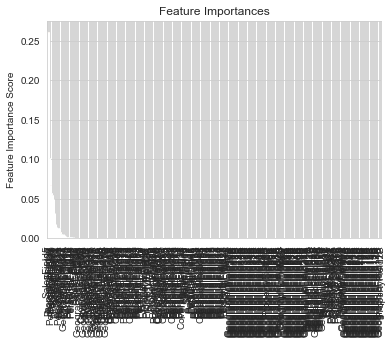

In [130]:
#Choose all predictors except target & IDcols
target='QuoteConversion_Flag'
predictors = [x for x in homesite_df.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, homesite_df, predictors)

In [131]:
gbm0.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [134]:
gbm_proba=gbm0.predict_proba(X_test)

In [135]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = gbm_proba

In [136]:
subfile = 'Predictions_GBM1.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: Predictions_GBM1.csv


### XGBoost Using H20

### Stack Ensembled USing H2O

In [213]:
train = h2o.import_file("train.csv")
test = h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [215]:
# Identify predictors and response
x = train.columns
y = "QuoteConversion_Flag"
x.remove(y)

In [216]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

In [217]:
# Number of CV folds (to generate level-one data for stacking)
nfolds = 5

In [218]:
# Train and cross-validate a GBM
my_gbm = H2OGradientBoostingEstimator(distribution="bernoulli",
                                      ntrees=100,
                                      max_depth=7,
                                      min_rows=5,
                                      learn_rate=0.2,
                                      nfolds=nfolds,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=27)
my_gbm.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [219]:
# Train and cross-validate a RF
my_rf = H2ORandomForestEstimator(ntrees=100,
                                 nfolds=nfolds,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=27)
my_rf.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [220]:
# Train a stacked ensemble using the GBM and GLM above
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial",
                                       base_models=[my_gbm, my_rf])
ensemble.train(x=x, y=y, training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [221]:
# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(train)

In [222]:
perf_stack_test


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.02595822341584187
RMSE: 0.1611155591984892
LogLoss: 0.09983947514565716
Null degrees of freedom: 260752
Residual degrees of freedom: 260750
Null deviance: 251675.34365208313
Residual deviance: 52066.88532531109
AIC: 52072.88532531109
AUC: 0.9922392124850552
pr_auc: 0.9367097620052114
Gini: 0.9844784249701104
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4282448308481734: 


,0,1,Error,Rate
0,208855.0,3004.0,0.0142,(3004.0/211859.0)
1,5700.0,43194.0,0.1166,(5700.0/48894.0)
Total,214555.0,46198.0,0.0334,(8704.0/260753.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4282448,0.9084676,197.0
max f2,0.1817429,0.9168274,282.0
max f0point5,0.6444449,0.9416620,132.0
max accuracy,0.4601008,0.9667195,186.0
max precision,0.9927700,1.0,0.0
max recall,0.0248174,1.0,378.0
max specificity,0.9927700,1.0,0.0
max absolute_mcc,0.4369486,0.8887489,194.0
max min_per_class_accuracy,0.1895768,0.9482145,279.0
max mean_per_class_accuracy,0.2053486,0.9484126,273.0


Gains/Lift Table: Avg response rate: 18.75 %, avg score: 19.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100018,0.9917365,5.3330265,5.3330265,1.0,0.9925710,1.0,0.9925710,0.0533399,0.0533399,433.3026547,433.3026547
,2,0.0200036,0.9903173,5.3330265,5.3330265,1.0,0.9910039,1.0,0.9917875,0.0533399,0.1066798,433.3026547,433.3026547
,3,0.0300016,0.9891350,5.3330265,5.3330265,1.0,0.9897254,1.0,0.9911003,0.0533194,0.1599992,433.3026547,433.3026547
,4,0.0400034,0.9877502,5.3330265,5.3330265,1.0,0.9884775,1.0,0.9904445,0.0533399,0.2133391,433.3026547,433.3026547
,5,0.0500013,0.9860405,5.3330265,5.3330265,1.0,0.9869261,1.0,0.9897410,0.0533194,0.2666585,433.3026547,433.3026547
,6,0.1000027,0.9556064,5.3326175,5.3328220,0.9999233,0.9757976,0.9999617,0.9827693,0.2666380,0.5332965,433.2617510,433.2822029
,7,0.1500002,0.6898105,5.1280832,5.2645792,0.9615709,0.8613591,0.9871654,0.9423013,0.2563914,0.7896879,412.8083209,426.4579245
,8,0.2000015,0.2720687,2.7200971,4.6284465,0.5100476,0.4578919,0.8678836,0.8211966,0.1360085,0.9256964,172.0097142,362.8446522
,9,0.3000004,0.0558126,0.6677788,3.3082408,0.1252157,0.1281096,0.6203308,0.5901706,0.0667771,0.9924735,-33.2221220,230.8240818
,10,0.3999992,0.0293723,0.0705616,2.4988288,0.0132311,0.0385316,0.4685573,0.4522622,0.0070561,0.9995296,-92.9438383,149.8828778


In [223]:
# Compare to base learner performance on the test set
perf_gbm_test = my_gbm.model_performance(train)
perf_rf_test = my_rf.model_performance(train)
baselearner_best_auc_test = max(perf_gbm_test.auc(), perf_rf_test.auc())
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))

Best Base-learner Test AUC:  0.9954389055307583
Ensemble Test AUC:  0.9922392124850552


In [224]:
pred_stack = ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [225]:
pred_stack.head(40)

predict,p0,p1
0,0.982941,0.0170594
0,0.974815,0.0251851
0,0.976915,0.0230849
0,0.983233,0.0167668
0,0.754973,0.245027
0,0.976873,0.0231269
0,0.984497,0.015503
0,0.973764,0.0262361
0,0.984649,0.0153514
0,0.983892,0.0161077


In [226]:
params_list = []
for key, value in ensemble.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'my_ensemble_binomial', 'type': 'Key<Model>', 'URL': '/3/Models/my_ensemble_binomial'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_12_sid_9c47', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_12_sid_9c47'}",
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QuoteConversion_Flag', 'is_member_of_frames': None}",
 'validation_frame = None',
 "base_models = [{'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_model_python_1554157670459_1549', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_model_python_1554157670459_1549'}, {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DRF_model_python_1554157670459_1884', 'type': 'Key

#### Saving file

In [227]:
# uncomment if you want to export the best model
h2o.save_model(ensemble, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsembleModel_0.99.csv", force=True)

'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\Assignment_3_KaggleCompetition\\homesite-quote-conversion\\StackEnsembleModel_0.99.csv\\my_ensemble_binomial'

In [228]:
h2o.export_file(pred_stack, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsembleModelpred2.csv", force=True)

Export File progress: |███████████████████████████████████████████████████| 100%


In [173]:
df_read=pd.read_csv("C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsembleModelpred2.csv")

In [192]:
df_read['QuoteConversion_Flag'] = np.where(df_read['p0'] >100, df_read['p0'] ,df_read['p0'])

In [193]:
df_read['QuoteConversion_Flag']

0         0.986626
1         0.977378
2         0.978729
3         0.985654
4         0.910024
5         0.976472
6         0.988904
7         0.973513
8         0.988936
9         0.986412
10        0.978132
11        0.751206
12        0.988426
13        0.925089
14        0.931767
15        0.965539
16        0.989342
17        0.989010
18        0.966392
19        0.959851
20        0.928491
21        0.730863
22        0.919627
23        0.924594
24        0.442502
25        0.500990
26        0.003462
27        0.979556
28        0.988830
29        0.984798
            ...   
173806    0.014845
173807    0.566487
173808    0.960435
173809    0.974810
173810    0.032034
173811    0.940547
173812    0.475428
173813    0.968963
173814    0.587302
173815    0.892047
173816    0.967736
173817    0.966636
173818    0.970737
173819    0.872007
173820    0.988936
173821    0.205729
173822    0.154498
173823    0.345092
173824    0.002694
173825    0.594492
173826    0.954997
173827    0.

In [194]:
test['QuoteNumber']

QuoteNumber
3
5
7
9
10
11
15
16
17
21


In [195]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = df_read['QuoteConversion_Flag']


subfile = 'Combine_stack_op_p0_p2.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: Combine_stack_op_p0_p2.csv


In [234]:
# 2. Generate a random grid of models and stack them together

# Specify GBM hyperparameters for the grid
hyper_params = {"learn_rate": [0.1, 0.07],
                "max_depth": [3, 4, 5, 6, 9],
                "sample_rate": [0.7, 0.8, 0.9, 1.0],
                "col_sample_rate": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 6, "seed": 27}

In [235]:
# Train the grid
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees=200,
                                                        seed=27,
                                                        nfolds=nfolds,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=hyper_params,
                     search_criteria=search_criteria,
                     grid_id="gbm_grid_binomial")
grid.train(x=x, y=y, training_frame=train)


gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [236]:
# Train a stacked ensemble using the GBM grid
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_gbm_grid_binomial",
                                       base_models=grid.model_ids)
ensemble.train(x=x, y=y, training_frame=train)


stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [237]:
perf_stack_test = ensemble.model_performance(train)

In [238]:
perf_stack_test


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.042811471968583134
RMSE: 0.2069093327247061
LogLoss: 0.15225261591608222
Null degrees of freedom: 260752
Residual degrees of freedom: 260744
Null deviance: 251675.34365208313
Residual deviance: 79400.65271593237
AIC: 79418.65271593237
AUC: 0.9762446444403008
pr_auc: 0.8825859013341169
Gini: 0.9524892888806016
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37783912546515475: 


,0,1,Error,Rate
0,205257.0,6602.0,0.0312,(6602.0/211859.0)
1,8867.0,40027.0,0.1814,(8867.0/48894.0)
Total,214124.0,46629.0,0.0593,(15469.0/260753.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3778391,0.8380599,207.0
max f2,0.1274541,0.8591370,305.0
max f0point5,0.6969919,0.8929456,106.0
max accuracy,0.5018770,0.9424705,167.0
max precision,0.9929997,1.0,0.0
max recall,0.0221136,1.0,391.0
max specificity,0.9929997,1.0,0.0
max absolute_mcc,0.4551806,0.8041746,182.0
max min_per_class_accuracy,0.1398046,0.9102139,299.0
max mean_per_class_accuracy,0.1572648,0.9104832,290.0


Gains/Lift Table: Avg response rate: 18.75 %, avg score: 18.98 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100018,0.9914314,5.3330265,5.3330265,1.0,0.9928045,1.0,0.9928045,0.0533399,0.0533399,433.3026547,433.3026547
,2,0.0200036,0.9911492,5.3330265,5.3330265,1.0,0.9912779,1.0,0.9920412,0.0533399,0.1066798,433.3026547,433.3026547
,3,0.0300016,0.9908489,5.3268896,5.3309814,0.9988493,0.9910223,0.9996165,0.9917016,0.0532581,0.1599378,432.6889578,433.0981414
,4,0.0400034,0.9891530,5.3248471,5.3294477,0.9984663,0.9900532,0.9993289,0.9912895,0.0532581,0.2131959,432.4847059,432.9447678
,5,0.0500013,0.9879216,5.3248439,5.3285271,0.9984657,0.9884967,0.9991563,0.9907311,0.0532376,0.2664335,432.4843921,432.8527138
,6,0.1000027,0.9563630,5.3011216,5.3148244,0.9940175,0.9778683,0.9965869,0.9842997,0.2650632,0.5314967,430.1121648,431.4824393
,7,0.1500002,0.5723557,4.2567672,4.9621567,0.7981898,0.7793118,0.9304579,0.9159739,0.2128277,0.7443245,325.6767220,396.2156703
,8,0.2000015,0.2724246,2.2656569,4.2880188,0.4248351,0.4064233,0.8040498,0.7885838,0.1132859,0.8576103,126.5656853,328.8018814
,9,0.3000004,0.0652546,0.9424578,3.1728461,0.1767210,0.1399882,0.5949429,0.5723880,0.0942447,0.9518550,-5.7542231,217.2846055
,10,0.3999992,0.0336819,0.3470813,2.4664117,0.0650815,0.0447055,0.4624788,0.4404687,0.0347077,0.9865628,-65.2918656,146.6411650


In [ ]:
# # Compare to base learner performance on the test set
# baselearner_best_auc_test = max([h2o.get_model(model).model_performance(test_data=test).auc() for model in grid.model_ids])
# stack_auc_test = perf_stack_test.auc()
# print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
# print("Ensemble Test AUC:  {0}".format(stack_auc_test))

In [239]:
# Generate predictions on a test set (if neccessary)
pred_stack2 = ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [240]:
pred_stack2

predict,p0,p1
0,0.979681,0.0203191
0,0.972725,0.0272747
0,0.968681,0.0313191
0,0.976908,0.0230921
0,0.880858,0.119142
0,0.973976,0.0260238
0,0.980347,0.0196531
0,0.972554,0.0274456
0,0.98072,0.01928
0,0.980917,0.0190827


In [241]:
ensemble.auc()

0.9762446444403008

In [242]:
# uncomment if you want to export the best model
h2o.save_model(ensemble, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsemblerandom_randomgrid.csv", force=True)

'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\Assignment_3_KaggleCompetition\\homesite-quote-conversion\\StackEnsemblerandom_randomgrid.csv\\my_ensemble_gbm_grid_binomial'

In [245]:
h2o.export_file(pred_stack2, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsembleModelpred4.csv", force=True)

Export File progress: |███████████████████████████████████████████████████| 100%
